# Analise de dados avançada com Python

<p>VAMOS FAZER UUMM.... rsrs não é comida haha 
    
<p> ...analise mais avançada dos dados, onde veremos alguns conceitos de estatisticas e gráficos.
    
<p>Os dados abaixo representam uma tabela de veiculos com valores e caracteristicas dos modelos.  <br> 


In [3]:
# A primeira coisa que temos que fazer é importar os pacotes que iremos utilizar.
# Obs.: Pacotes do Python são conjuntos de funcionalidades disponíveis da ferramenta.

#Pandas: Possui inúmeras funções e comandos para importar arquivos, analisar dados, tratar dados, etc.
import pandas as pd

#Matplotlib: Possui uma série de funções e comandos para exibição de gráficos
import matplotlib.pyplot as plt

#Seaborn: Possui uma série de funções e comandos para exibição de gráficos (Visualizações mais robustas do que o Matplotlib)
import seaborn as sns

#Warnings: Possui uma série de funções e comandos para tratamento de mensagens de avisos e alertas do Python
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Comando para exibir todas colunas do arquivo
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
#Comando utilizado para carregar o arquivo e armazena-lo como um DataFrame do Pandas
#Um DataFrame do Pandas é como se fosse uma planilha do Excel, onde podemos tratar linhas e colunas.
df_dados = pd.read_excel("dados.xlsx")

In [6]:
#Comando utilizado para verificar a quantidade de linhas e colunas do arquivo
#Colunas também são chamadas de variáveis.
df_dados.shape

(984, 10)

In [7]:
#Comando utilizado para verificar as linhas iniciais do DataFrame
df_dados.head()

,DATA_VENDA,MODELO,KM-LITRO,CILINDROS,PESO(KG),VELOCIDADE_MAXIMA(KM/H),CAVALOS,TRANSMISSAO,VALOR,CATEGORIA
0,10/1/2020,LABORGUINI,3.0,12,1200,360,700,AUTOMATICO,900000,IMPORTADO
1,10/1/2020,FERRARI,3.0,12,1400,360,640,AUTOMATICO,900000,IMPORTADO
2,10/1/2020,ASTON MARTIN,3.5,10,1600,360,620,AUTOMATICO,900000,IMPORTADO
3,10/1/2020,MERCEDES SL80,4.5,8,1700,360,480,AUTOMATICO,800000,IMPORTADO
4,10/1/2020,HONDA FIT,12.0,4,1700,200,116,AUTOMATICO,120000,NACIONAL


In [8]:
#Comando utilizado para verificar as linhas finais do DataFrame
df_dados.tail()

,DATA_VENDA,MODELO,KM-LITRO,CILINDROS,PESO(KG),VELOCIDADE_MAXIMA(KM/H),CAVALOS,TRANSMISSAO,VALOR,CATEGORIA
979,10/12/2021,HONDA FIT,12.0,4,1700,200,116,AUTOMATICO,120000,NACIONAL
980,10/12/2021,PALIO,11.0,4,1700,200,118,MANUAL,60000,NACIONAL
981,10/12/2021,UNO,13.5,4,1700,200,118,MANUAL,48000,NACIONAL
982,10/12/2021,MOBI,14.0,4,1700,200,118,MANUAL,42000,NACIONAL
983,10/12/2021,PASSAT,8.0,6,1800,200,118,MANUAL,200000,IMPORTADO


In [9]:
#Avaliar o período dos dados coletados
inicio = pd.to_datetime(df_dados['DATA_VENDA']).dt.date.min()
fim = pd.to_datetime(df_dados['DATA_VENDA']).dt.date.max()
print('Período dos dados - De:', inicio, 'Até:',fim)

Período dos dados - De: 2020-10-01 Até: 2021-10-12


In [10]:
#Comando utilizado para verificar informações sobre os dados(Tipo de variáveis, Variáveis, Quantidade de registros, etc)
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DATA_VENDA               984 non-null    object 
 1   MODELO                   984 non-null    object 
 2   KM-LITRO                 984 non-null    float64
 3   CILINDROS                984 non-null    int64  
 4   PESO(KG)                 984 non-null    int64  
 5   VELOCIDADE_MAXIMA(KM/H)  984 non-null    int64  
 6   CAVALOS                  984 non-null    int64  
 7   TRANSMISSAO              984 non-null    object 
 8   VALOR                    984 non-null    int64  
 9   CATEGORIA                984 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 77.0+ KB


In [11]:
# Comando utilizado para avaliar se alguma variável possui valor nulo ou chamado de valores missing ou NAN (Not Available)
df_dados.isnull().sum()

DATA_VENDA                 0
MODELO                     0
KM-LITRO                   0
CILINDROS                  0
PESO(KG)                   0
VELOCIDADE_MAXIMA(KM/H)    0
CAVALOS                    0
TRANSMISSAO                0
VALOR                      0
CATEGORIA                  0
dtype: int64

In [12]:
#Comando utilizado para fazer uma analise rápida com medidas estatisticas(Média, Mediana, Desvio Padrão, etc)
df_dados.describe()

,KM-LITRO,CILINDROS,PESO(KG),VELOCIDADE_MAXIMA(KM/H),CAVALOS,VALOR
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,8.223780,6.103659,1960.975610,255.121951,260.024390,297103.658537
std,3.712926,2.754711,458.957933,71.026376,203.025136,334160.650302
min,3.000000,3.000000,1200.000000,200.000000,116.000000,18000.000000
25%,4.500000,4.000000,1700.000000,200.000000,118.000000,42000.000000
50%,8.000000,4.000000,1700.000000,200.000000,118.000000,120000.000000
75%,11.000000,8.000000,2300.000000,360.000000,340.000000,400000.000000
max,14.000000,12.000000,3000.000000,360.000000,700.000000,900000.000000


In [13]:
# Outra forma de avaliarmos uma variável especifica e exibirmos a informação. 

print('Valor mínimo: ', df_dados['VALOR'].min())
print('Valor máximo: ', df_dados['VALOR'].max())
print('Valor da média:' , df_dados['VALOR'].mean())
print('Valor da médiana:', df_dados['VALOR'].median())
print('Valor da Moda:', df_dados['VALOR'].mode())
print('Valor da Variancia:', df_dados['VALOR'].var())

Valor mínimo:  18000
Valor máximo:  900000
Valor da média: 297103.65853658534
Valor da médiana: 120000.0
Valor da Moda: 0    900000
Name: VALOR, dtype: int64
Valor da Variancia: 111663340210.40619


In [14]:
# Média
# A média ou média aritmética, nada mais é do que a soma de todos os dados da amostra dividido pela quantidade de amostras. 

media = df_dados['VALOR'].mean()
print("Média ", media)

Média  297103.65853658534


In [15]:
# Mediana
# Mediana é o valor representado pela amostra central, estando as amostras ordenadas em valores crescentes, 
# caso o total de elementos for par, será necessário calcular a média dos dois valores centrais. 

mediana = df_dados['VALOR'].median() 
print("Mediana ", mediana)

Mediana  120000.0


In [16]:
# Moda
# A Moda é o valor que aparece com mais frequência em um conjunto de dados, ou seja, o valor que se repete mais vezes. 

moda = df_dados['VALOR'].mode() 
print("Moda ", moda[0])

Moda  900000


In [17]:
# Variância
# A variância é uma medida de dispersão dos dados, mede o quão afastados os dados estão da média. 
# Quanto maior a variância, mais afastados os dados encontram-se da média. Assim temos a variância populacional.

variancia = df_dados['VALOR'].var() 
print("Variância ", variancia)

Variância  111663340210.40619


In [18]:
# Desvio Padrão
# O desvio padrão (standard deviation) é a raiz quadrada da variância. 
# Toda discussão em relação à variância populacional Vs. amostral se aplica, com as devidas mudanças, ao desvio padrão.

desvio = df_dados['VALOR'].std() 
print("Desvio padrão ", desvio)

Desvio padrão  334160.65030222543


In [19]:
# Quantis
# Quantis são pontos que dividem uma distribuição de probabilidade em partições de tamanhos iguais.  
# Eles podem ser quartis (sendo o 1º quartil correspondente a 25% dos dados, 
# o segundo quartil correspondente a 50% dos dados – a mediana e o 3º quartil correspondente a 75% dos dados) 
# ou percentis (dividem a amostra em 100 partes).

Q1 = df_dados['VALOR'].quantile(0.25)
Q2 = df_dados['VALOR'].quantile(0.5)
Q3 = df_dados['VALOR'].quantile(0.75)
print('Primeiro quartil ', Q1)
print('Segundo quartil (Mediana)', Q2)
print('Terceiro quartil ', Q3)

Primeiro quartil  42000.0
Segundo quartil (Mediana) 120000.0
Terceiro quartil  400000.0


In [20]:
# Intervalo Interquartil (IQR)
# O IQR (do inglês, Interquartile Range), é a diferença entre o terceiro e primeiro quartis: IQR = Q3−Q1. 
# É uma medida de dispersão robusta muito utilizada, por exemplo, quando os dados contêm muitos outliers 
# por ser menos sensível às variações nos extremos do conjunto.
    
IQR = Q3 - Q1
print('Intervalo interquartil ', IQR)

Intervalo interquartil  358000.0


In [21]:
# Assimetria (Skewness)
# Assimetria é, na verdade, uma medida de simetria. Ela nos diz o quão simétrica é a distribuição dos dados em torno da média. 
# E junto com a curtose (kurtosis) que veremos em seguida, é uma medida muito boa para informar a aparência ou forma da 
# distribuição dos dados.

assimetria = df_dados['VALOR'].skew()
print('Assimetria(Skewness) ', assimetria)

Assimetria(Skewness)  1.0274405638938164


In [22]:
# Curtose (Kurtosis)
# A Curtose ou achatamento também é uma medida que nos ajuda a dar forma à distribuição dos dados. 
# A curtose, diferente da assimetria, tenta capturar em uma medida a forma das caudas da distribuição.

curtose = df_dados['VALOR'].kurtosis()
print('Curtose ', curtose)

Curtose  -0.6846154705432306


In [23]:
# Total de valores únicos de cada variável
valores_unicos = []
for i in df_dados.columns[0:14].tolist():
    print(i, ':', len(df_dados[i].astype(str).value_counts()))
    valores_unicos.append(len(df_dados[i].astype(str).value_counts()))

DATA_VENDA : 24
MODELO : 22
KM-LITRO : 14
CILINDROS : 6
PESO(KG) : 14
VELOCIDADE_MAXIMA(KM/H) : 5
CAVALOS : 12
TRANSMISSAO : 2
VALOR : 18
CATEGORIA : 2


In [24]:
# Verificar quantidade de registros com valor superior a 800.000
df_dados.loc[df_dados['VALOR'] > 800000].count()

DATA_VENDA                 168
MODELO                     168
KM-LITRO                   168
CILINDROS                  168
PESO(KG)                   168
VELOCIDADE_MAXIMA(KM/H)    168
CAVALOS                    168
TRANSMISSAO                168
VALOR                      168
CATEGORIA                  168
dtype: int64

In [25]:
# Quais são os casos com valores superiores a 800.000
df_dados.loc[df_dados['VALOR'] > 800000]

,DATA_VENDA,MODELO,KM-LITRO,CILINDROS,PESO(KG),VELOCIDADE_MAXIMA(KM/H),CAVALOS,TRANSMISSAO,VALOR,CATEGORIA
0,10/1/2020,LABORGUINI,3.0,12,1200,360,700,AUTOMATICO,900000,IMPORTADO
1,10/1/2020,FERRARI,3.0,12,1400,360,640,AUTOMATICO,900000,IMPORTADO
2,10/1/2020,ASTON MARTIN,3.5,10,1600,360,620,AUTOMATICO,900000,IMPORTADO
22,10/2/2020,LABORGUINI,3.0,12,1200,360,700,AUTOMATICO,900000,IMPORTADO
23,10/2/2020,FERRARI,3.0,12,1400,360,640,AUTOMATICO,900000,IMPORTADO
24,10/2/2020,ASTON MARTIN,3.5,10,1600,360,620,AUTOMATICO,900000,IMPORTADO
35,10/3/2020,LABORGUINI,3.0,12,1200,360,700,AUTOMATICO,900000,IMPORTADO
36,10/3/2020,FERRARI,3.0,12,1400,360,640,AUTOMATICO,900000,IMPORTADO
37,10/3/2020,ASTON MARTIN,3.5,10,1600,360,620,AUTOMATICO,900000,IMPORTADO
57,10/3/2020,LABORGUINI,3.0,12,1200,360,700,AUTOMATICO,900000,IMPORTADO


In [26]:
# Aqui podemos observar a quantidade de registros por tipo de transmissao
df_dados.groupby(['TRANSMISSAO']).size()

TRANSMISSAO
AUTOMATICO    534
MANUAL        450
dtype: int64

In [27]:
# Aqui podemos observar a quantidade de registros por tipo de categoria
df_dados.groupby(['CATEGORIA']).size()

CATEGORIA
IMPORTADO    402
NACIONAL     582
dtype: int64

In [28]:
# Aqui podemos observar a quantidade de registros por potencia(cavalos)
df_dados.groupby(['CAVALOS']).size()

CAVALOS
116     66
118    486
190     36
210     24
230     30
250     36
280     36
340     36
480     66
620     66
640     54
700     48
dtype: int64

In [29]:
# Aqui podemos observar a quantidade de registros por cilindros
df_dados.groupby(['CILINDROS']).size()

CILINDROS
3      30
4     480
6     168
8     138
10     66
12    102
dtype: int64

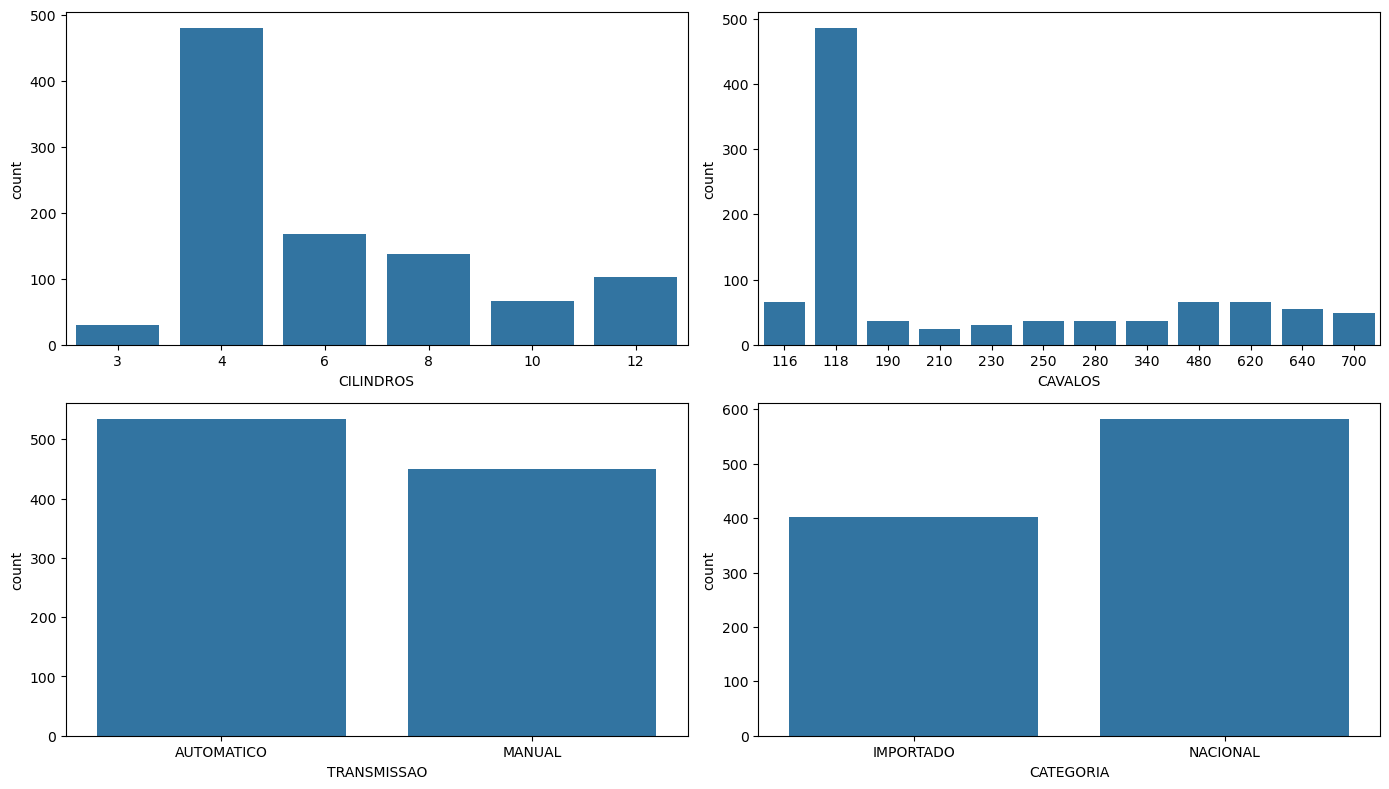

In [30]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = df_dados, x="CILINDROS", ax=axes[0][0])
sns.countplot(data = df_dados, x="CAVALOS", ax=axes[0][1])
sns.countplot(data = df_dados, x="TRANSMISSAO", ax=axes[1][0])
sns.countplot(data = df_dados, x="CATEGORIA", ax=axes[1][1])

plt.show()

In [31]:
# Como no grafico anterior aumentamos o tamanho da figura, temos que diminuir aqui senão a exibição ficará muito grande.
plt.rcParams["figure.figsize"] = [4.00, 4.00]

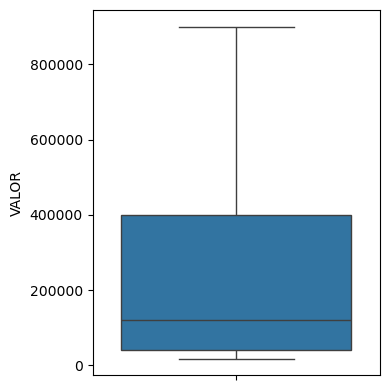

In [32]:
# Boxplots
# Boxplot é utilizado para avaliar e comparar o formato, tendência central e variabilidade de distribuições de amostra, 
# e para procurar por outliers. Por padrão, um boxplot demonstra a mediana, os quartis, 
# o intervalo interquartil(IQR) e outliers para cada variável. 

# Outlier são valores que estão bem discrepantes dentro do conjunto de dados, podem ser para mais ou para menos. Observe abaixo
# que há 2 pontinhos no boxplot, que seriam os valores outliers.

sns.boxplot(data = df_dados, y = "VALOR")
plt.show()

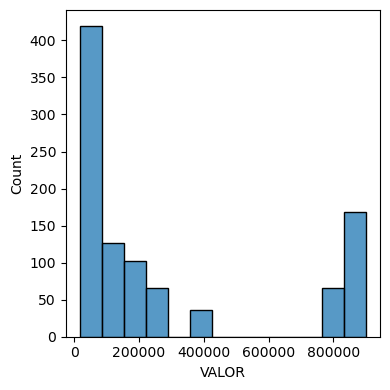

In [33]:
# Histogramas
# Um histograma é uma visualização gráfica de dados usando barras de diferentes alturas. 
# Em um histograma, cada barra agrupa números em intervalos. 
# As barras mais altas mostram que mais dados estão nesse intervalo. Um histograma exibe a forma e distribuição de dados 
# amostrais discretos ou contínuos.

sns.histplot(df_dados['VALOR'])
plt.show()

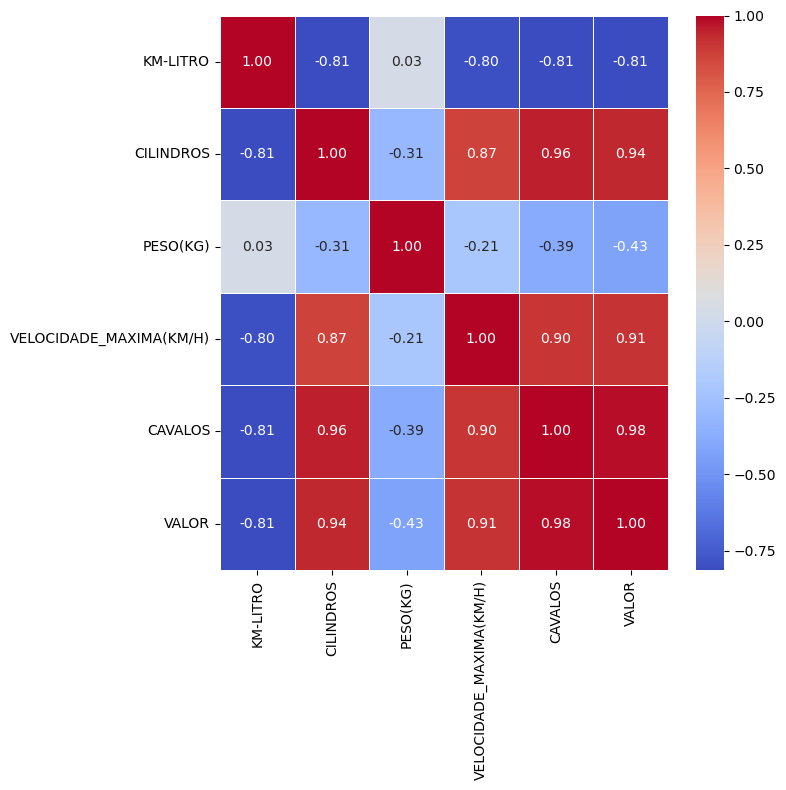

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Correlação
# A correção é utilizada para entender como as variaveis se relacionam entre si.
# A correção vai de -1 até +1 onde -1 significa uma forte correlação negativa e +1 significa uma forte correlação positiva.
# Correlação NÃO é causalidade, ou seja, uma relação entre as variaveis não significa que uma é a causa do valor da outra.

# Carregar os dados
df_dados = pd.read_excel("dados.xlsx") 

# 1. Converter colunas de data para o formato datetime (caso necessário)
# Aqui estou assumindo que você tem uma coluna de data chamada 'data'. Substitua pelo nome correto, se necessário.
if 'data' in df_dados.columns:
    df_dados['data'] = pd.to_datetime(df_dados['data'], errors='coerce')

# 2. Converter colunas para valores numéricos, se necessário
# Se a coluna 'VALOR' ou qualquer outra coluna contiver valores não numéricos, podemos forçar a conversão:
df_dados['VALOR'] = pd.to_numeric(df_dados['VALOR'], errors='coerce')

# 3. Selecionar apenas as colunas numéricas para a correlação
df_dados_numerico = df_dados.select_dtypes(include=['number'])

# 4. Calcular a correlação
corr_matrix = df_dados_numerico.corr()

# 5. Gerar o gráfico de correlação
plt.figure(figsize=(8, 8))  # Ajusta o tamanho da figura
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# 6. Mostrar o gráfico
plt.show()


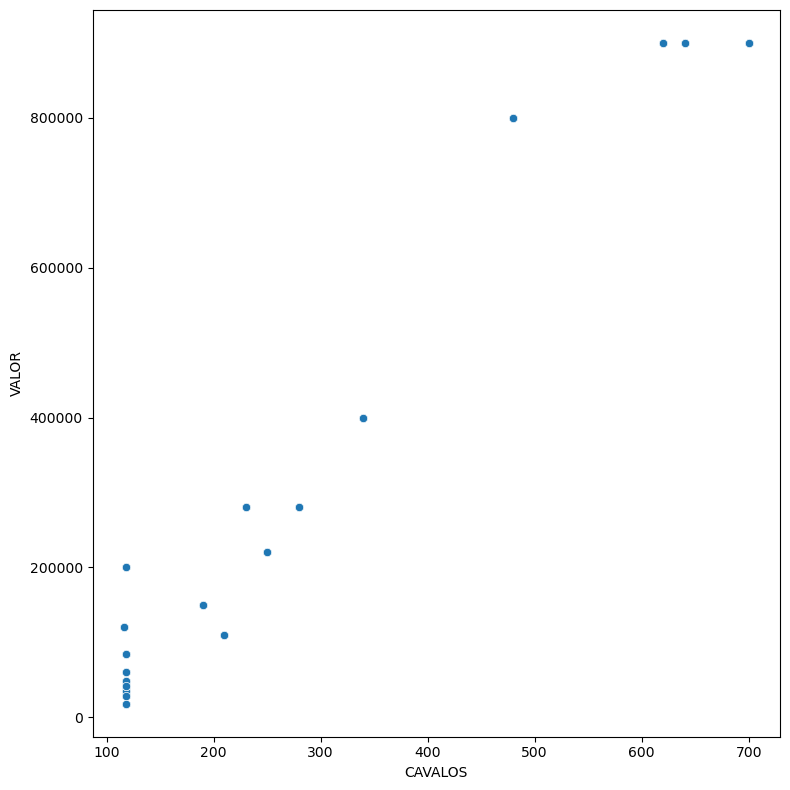

In [36]:
# Scater-Plot ou Gráfico de Dispersão
# Esse gráfico pode ser utilizado para comprovar a correção das variáveis e também visualizar como as mesmas se relacionam
# Observe que a médida que os CAVALOS DE POTENCIA aumentam o valor do carro também aumenta.
# Observe que neste caso temos uma forte correção positiva.
sns.scatterplot(data = df_dados, x = "CAVALOS", y = "VALOR")
plt.show()

KM-LITRO : float64
CILINDROS : int64
PESO(KG) : int64
VELOCIDADE_MAXIMA(KM/H) : int64
CAVALOS : int64
VALOR : int64


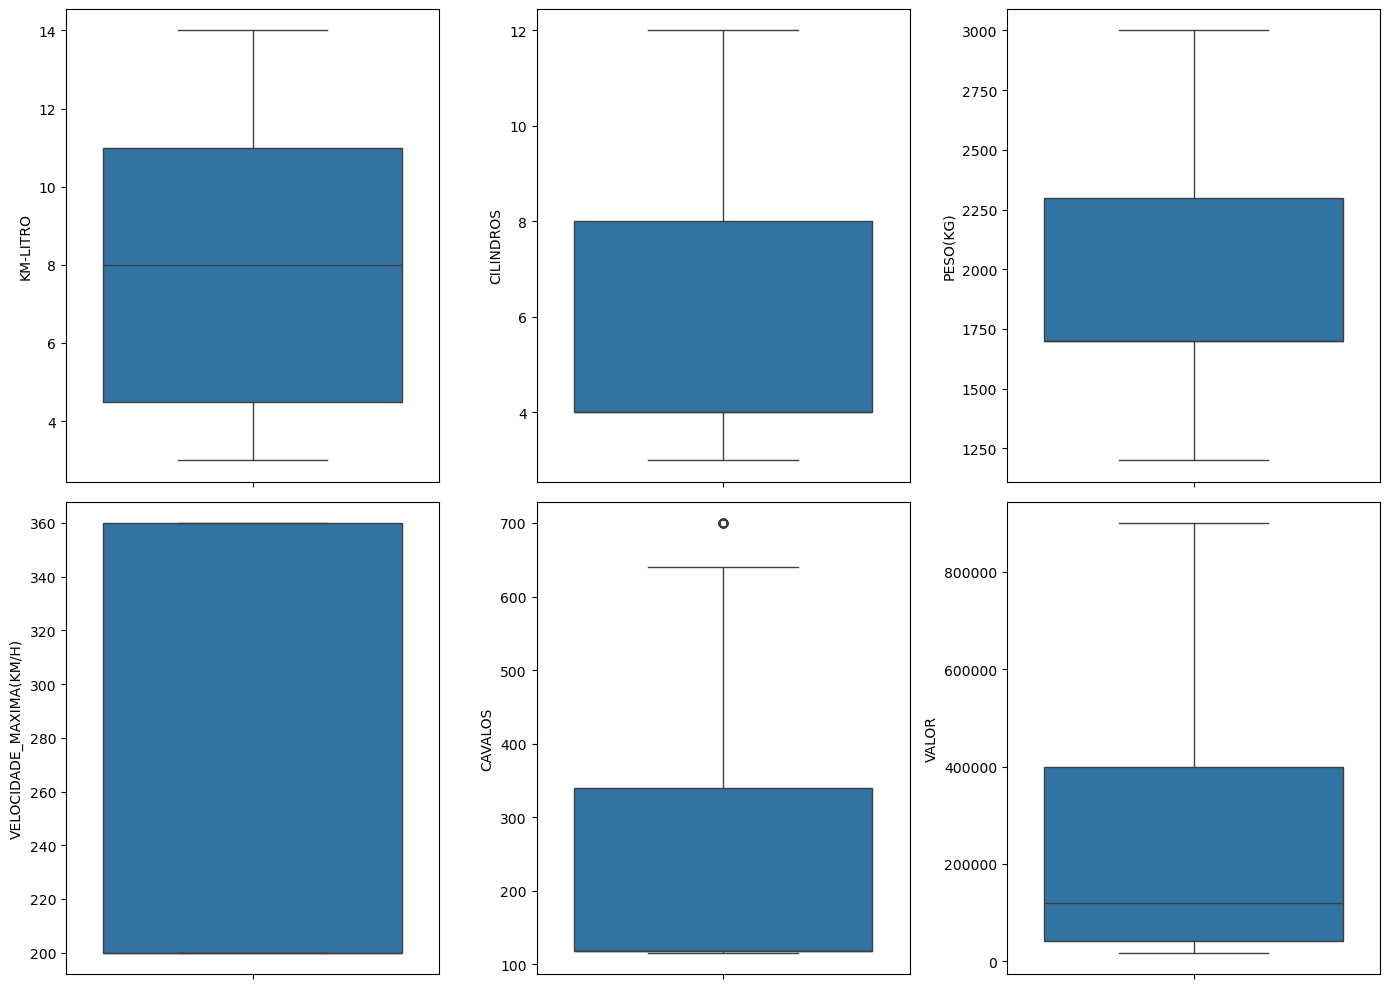

In [37]:
#carregar variaveis para plot
variaveis_numericas = []
for i in df_dados.columns[0:11].tolist():
        if df_dados.dtypes[i] == 'int64' or df_dados.dtypes[i] == 'float64':            
            print(i, ':' , df_dados.dtypes[i]) 
            variaveis_numericas.append(i)
 
    
    
    
plt.rcParams["figure.figsize"] = [14.00, 10.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(2, 3) #8 linhas e 4 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df_dados, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0            

plt.show() 

KM-LITRO : float64
CILINDROS : int64
PESO(KG) : int64
VELOCIDADE_MAXIMA(KM/H) : int64
CAVALOS : int64
VALOR : int64


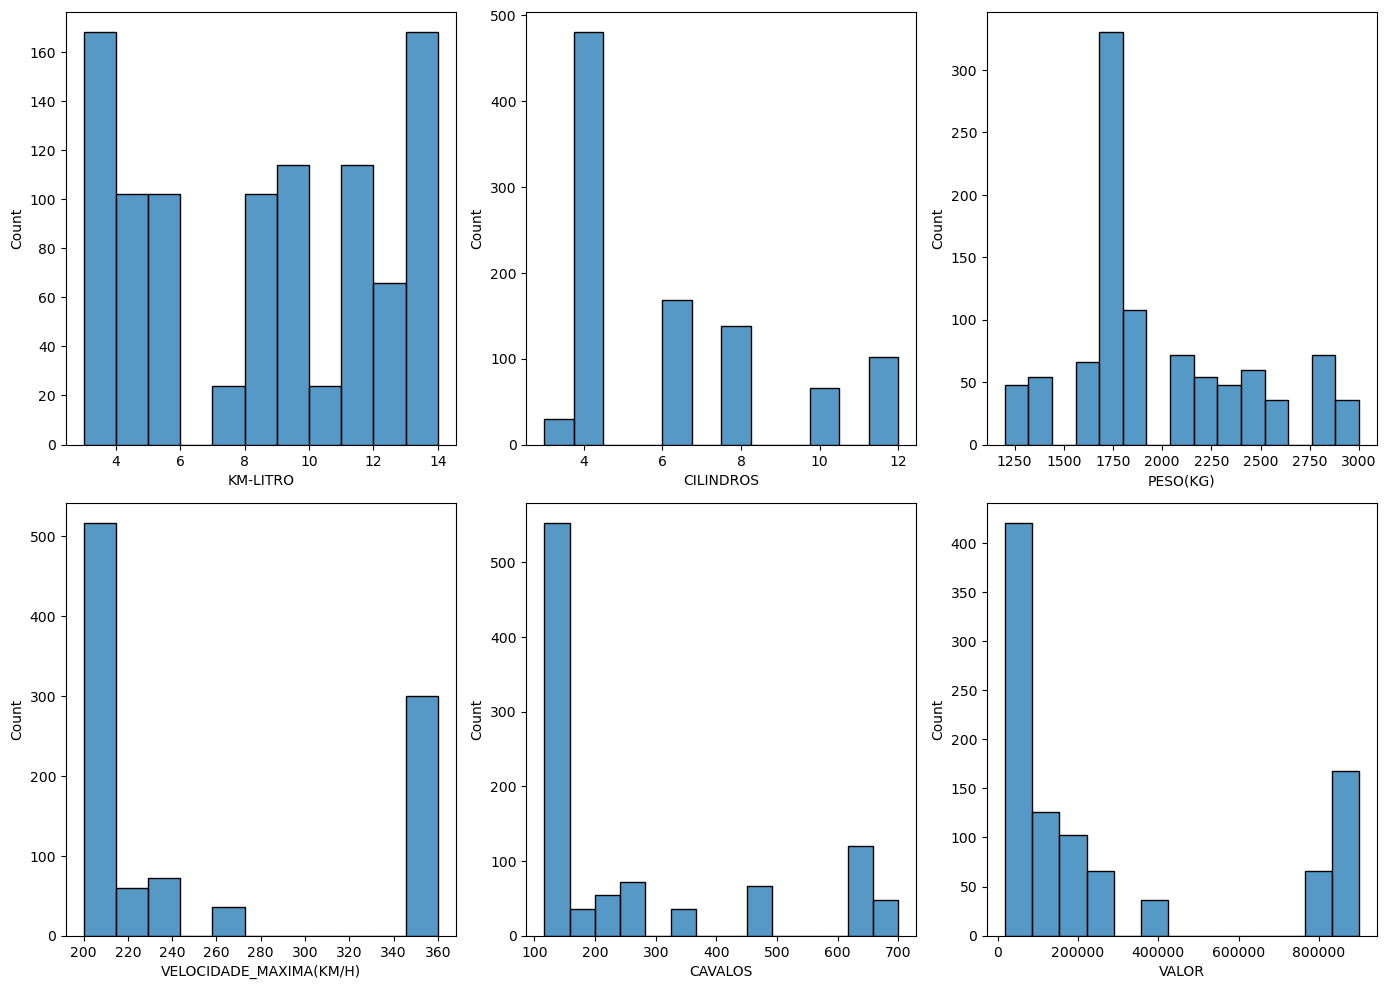

In [38]:
#carregar variaveis para plot
variaveis_numericas = []
for i in df_dados.columns[0:11].tolist():
        if df_dados.dtypes[i] == 'int64' or df_dados.dtypes[i] == 'float64':            
            print(i, ':' , df_dados.dtypes[i]) 
            variaveis_numericas.append(i)
    
    
    
plt.rcParams["figure.figsize"] = [14.00, 10.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20



f, axes = plt.subplots(2, 3) #8 linhas e 4 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.histplot(data = df_dados, x=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0            

plt.show() 

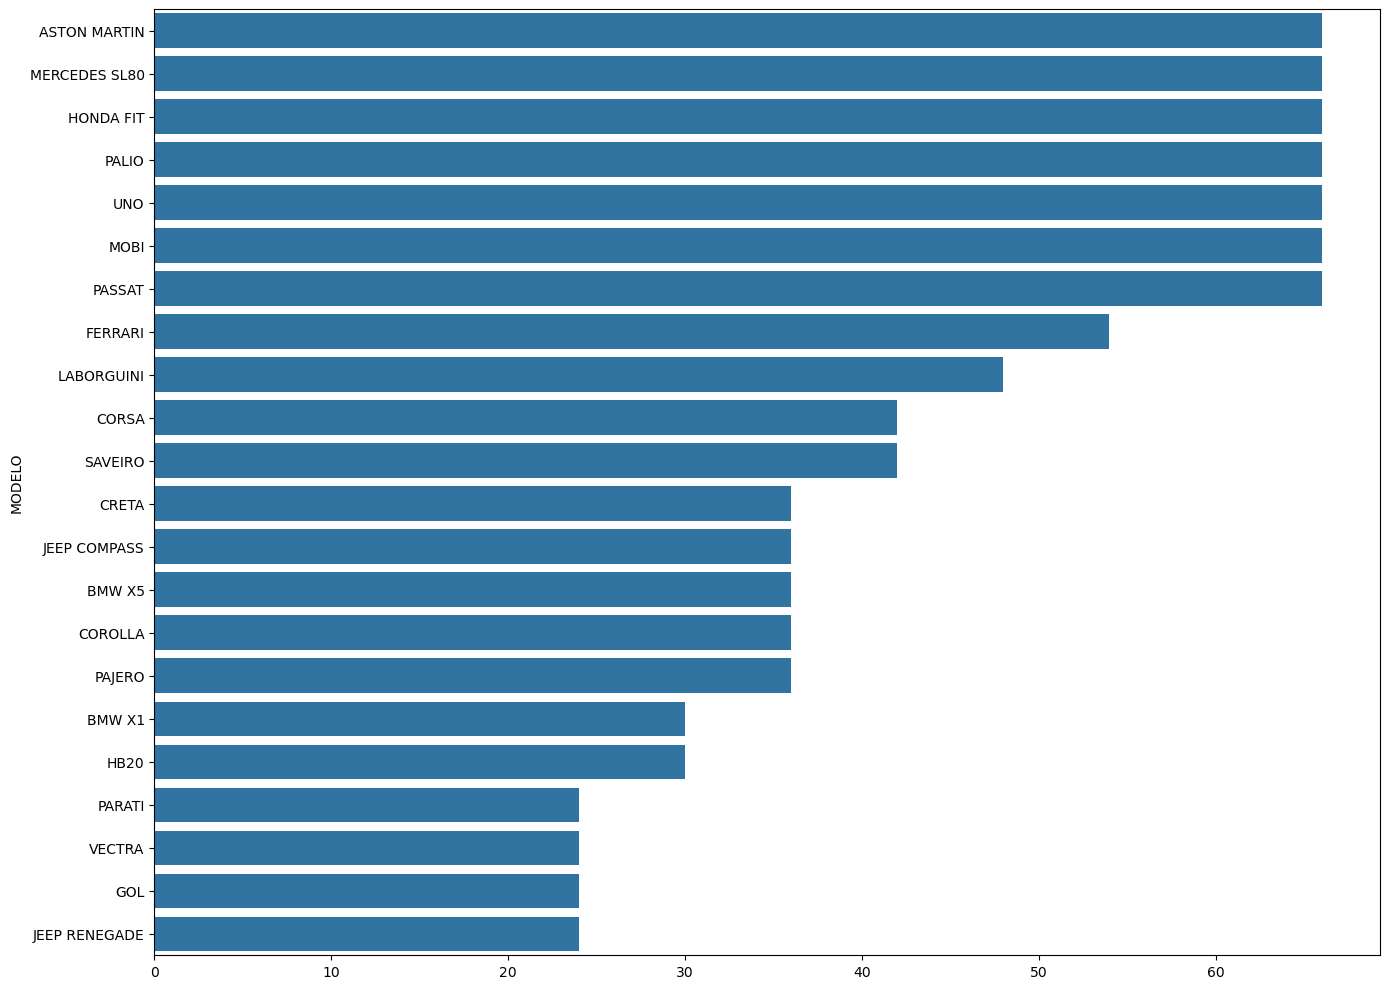

In [39]:
# Identificando os modelos mais vendidos
x = df_dados['MODELO'].value_counts().values
y = df_dados['MODELO'].value_counts().index
sns.barplot( x=x, y=y ) 
plt.show()

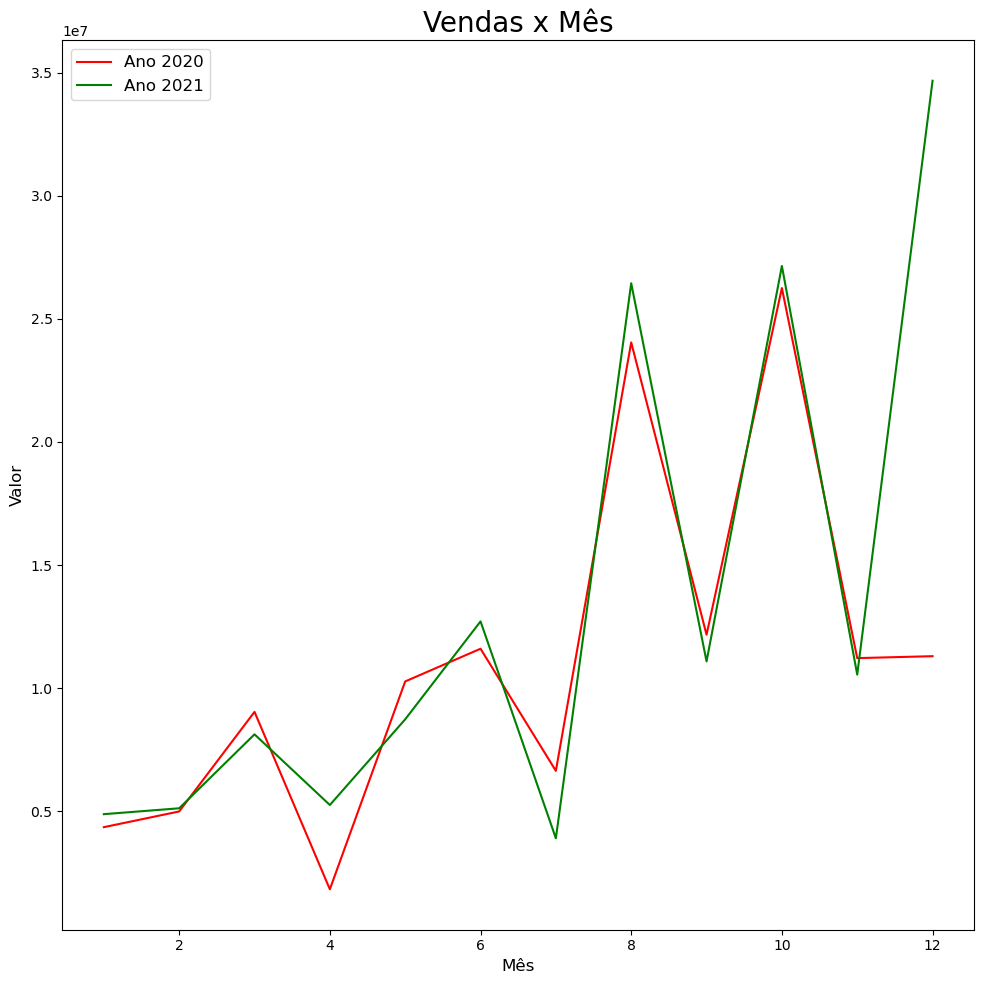

In [40]:
#Agora podemos exibir um gráfico comparativo entre as vendas de 2020 e 2021

# Reiniciando o matplotlib
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

# Formatando tamanho do grafico
plt.rcParams["figure.figsize"] = [10.00, 10.00]
plt.rcParams['font.size'] = 12 
plt.rcParams['axes.titlesize'] = 20


#Convertendo o campo DATA_VENDA para DateTime
df_dados['DATA_VENDA'] = pd.to_datetime(df_dados['DATA_VENDA'], format="%d/%m/%Y")

#Selecionando apenas as vendas de 2021
df_2020 = df_dados[df_dados["DATA_VENDA"].dt.year == 2020]

#Selecionando apenas as vendas de 2021
df_2021 = df_dados[df_dados["DATA_VENDA"].dt.year == 2021]

# Comparativo de lucro bruto por mês
df_2020.groupby(df_2020["DATA_VENDA"].dt.month)["VALOR"].sum().plot(color='red', label='Ano 2020')
df_2021.groupby(df_2021["DATA_VENDA"].dt.month)["VALOR"].sum().plot(color='green', label='Ano 2021')
plt.title("Vendas x Mês")
plt.ylabel("Valor")
plt.xlabel("Mês")

plt.legend()
plt.show()

In [41]:
#df_2020.groupby(df_2020["DATA_VENDA"].dt.month)["VALOR"].sum()

df_2020.groupby(df_2020["DATA_VENDA"].dt.month).agg({"VALOR": "sum"}).style.format("{:,.2f}")

,VALOR
DATA_VENDA,
1,"4,353,000.00"
2,"4,991,000.00"
3,"9,037,000.00"
4,"1,829,000.00"
5,"10,273,000.00"
6,"11,602,000.00"
7,"6,640,000.00"
8,"24,045,000.00"
9,"12,171,000.00"


In [42]:
df_2020.groupby(df_2020["DATA_VENDA"].dt.month).agg({"VALOR": "sum"}).style.format("{:,.2f}")

,VALOR
DATA_VENDA,
1,"4,353,000.00"
2,"4,991,000.00"
3,"9,037,000.00"
4,"1,829,000.00"
5,"10,273,000.00"
6,"11,602,000.00"
7,"6,640,000.00"
8,"24,045,000.00"
9,"12,171,000.00"


In [43]:
df_2021.groupby(df_2021["DATA_VENDA"].dt.month)["VALOR"].sum()

DATA_VENDA
1      4881000
2      5120000
3      8124000
4      5253000
5      8734000
6     12712000
7      3901000
8     26448000
9     11086000
10    27152000
11    10550000
12    34675000
Name: VALOR, dtype: int64

In [44]:
#df_2020['DATA_VENDA'] = df_2020['DATA_VENDA'].dt.strftime('%m-%Y')
#df_2021.groupby(df_2021["DATA_VENDA"].dt.month).agg({"VALOR": "sum"}).style.format("{:,.2f}")


(df_2021.groupby(df_2021["DATA_VENDA"].dt.strftime('%m-%Y')).agg({"VALOR": "sum"}).style.format("{:,.2f}"))

,VALOR
DATA_VENDA,
01-2021,"4,881,000.00"
02-2021,"5,120,000.00"
03-2021,"8,124,000.00"
04-2021,"5,253,000.00"
05-2021,"8,734,000.00"
06-2021,"12,712,000.00"
07-2021,"3,901,000.00"
08-2021,"26,448,000.00"
09-2021,"11,086,000.00"


In [45]:
def formata_valores(valor, pos):
    """
    Transforma grandes valores (na casa dos bilhões, milhões e milhares), como 4500 em 4,5 K e também transforma adequadamente 4000 em 4 K (sem zero após o decimal).
    """
    
    if valor >= 1000000000:
        val = round(valor/1000000000, 1)
        novo_valor_formatado = '{:}B'.format(val)
    elif valor >= 1000000:
        val = round(valor/1000000, 1)
        novo_valor_formatado = '{:}M'.format(val)
    elif valor >= 1000:
        val = round(valor/1000, 1)
        novo_valor_formatado = '{:}K'.format(val)
    elif valor < 1000:
        novo_valor_formatado = round(valor, 1)
    else:
        novo_valor_formatado = valor

    # make new_tick_format into a string value
    novo_valor_formatado = str(novo_valor_formatado)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = novo_valor_formatado.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = novo_valor_formatado[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            novo_valor_formatado = novo_valor_formatado[0:index_of_decimal] + novo_valor_formatado[index_of_decimal+2:]
            
    return novo_valor_formatado

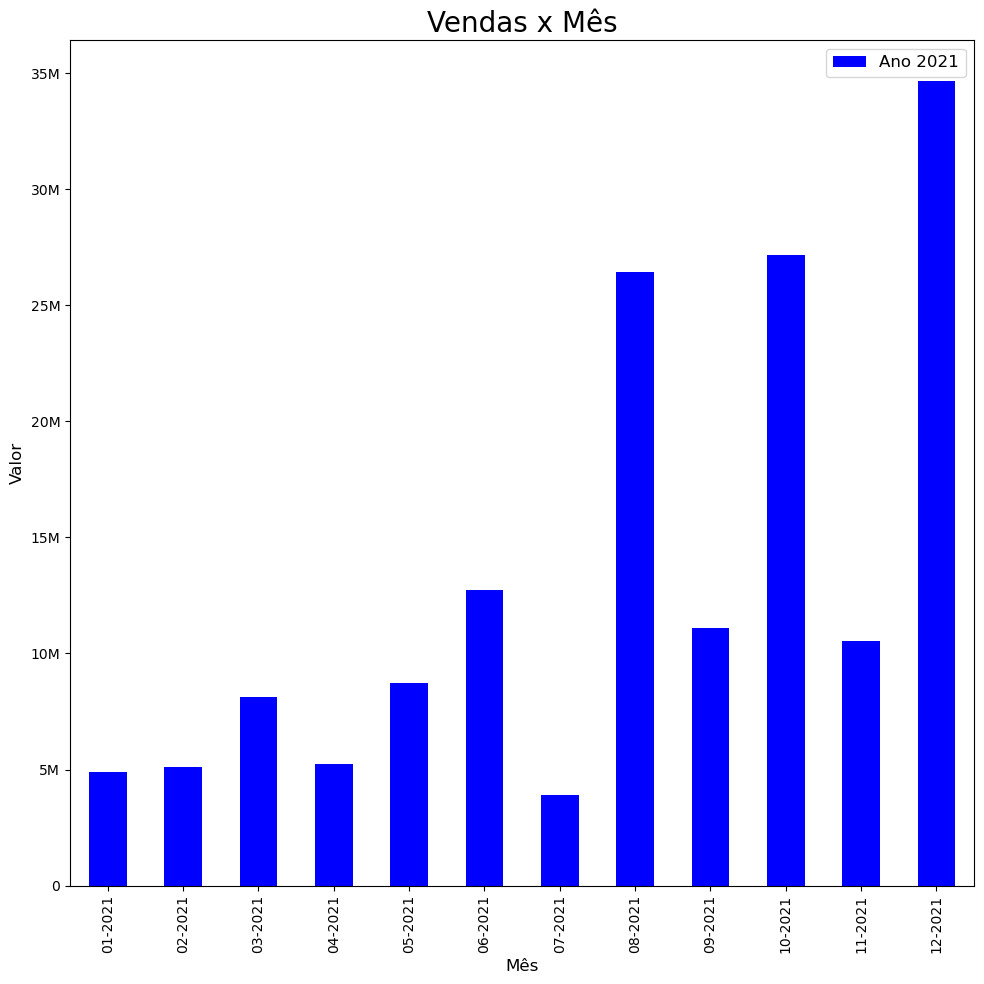

In [46]:
#df_2021.groupby(df_2021["DATA_VENDA"].dt.month)["VALOR"].sum().plot.bar(color='blue', label='Ano 2021')
import matplotlib.ticker as tick


df_2021.groupby(df_2021["DATA_VENDA"].dt.strftime('%m-%Y'))["VALOR"].sum().plot.bar(color='blue', label='Ano 2021')


plt.ticklabel_format(style='plain', axis='y')
plt.title("Vendas x Mês")
plt.ylabel("Valor")
plt.xlabel("Mês")
plt.legend()
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(formata_valores));

In [47]:
df_2021.groupby(df_2021["DATA_VENDA"].dt.month)["VALOR"].sum()

DATA_VENDA
1      4881000
2      5120000
3      8124000
4      5253000
5      8734000
6     12712000
7      3901000
8     26448000
9     11086000
10    27152000
11    10550000
12    34675000
Name: VALOR, dtype: int64

In [48]:
# Extract formatted string on which to groupby

df_2020['DATA_VENDA'] = df_2020['DATA_VENDA'].dt.strftime('%m-%Y')
df_2020.groupby(['DATA_VENDA'])['VALOR'].sum()

DATA_VENDA
01-2020     4353000
02-2020     4991000
03-2020     9037000
04-2020     1829000
05-2020    10273000
06-2020    11602000
07-2020     6640000
08-2020    24045000
09-2020    12171000
10-2020    26254000
11-2020    11220000
12-2020    11299000
Name: VALOR, dtype: int64

In [49]:
df_2021.groupby(['DATA_VENDA'], as_index=False)['VALOR'].sum()

,DATA_VENDA,VALOR
0,2021-01-10,4881000
1,2021-02-10,5120000
2,2021-03-10,8124000
3,2021-04-10,5253000
4,2021-05-10,8734000
5,2021-06-10,12712000
6,2021-07-10,3901000
7,2021-08-10,26448000
8,2021-09-10,11086000
9,2021-10-10,27152000


In [50]:
df_2021.groupby(['DATA_VENDA']).agg({"VALOR": "sum"}).style.format("{:,.2f}")

,VALOR
DATA_VENDA,
2021-01-10 00:00:00,"4,881,000.00"
2021-02-10 00:00:00,"5,120,000.00"
2021-03-10 00:00:00,"8,124,000.00"
2021-04-10 00:00:00,"5,253,000.00"
2021-05-10 00:00:00,"8,734,000.00"
2021-06-10 00:00:00,"12,712,000.00"
2021-07-10 00:00:00,"3,901,000.00"
2021-08-10 00:00:00,"26,448,000.00"
2021-09-10 00:00:00,"11,086,000.00"
